In [1]:
import numpy as np
import pandas as pd

In [2]:
basesusep= pd.read_html('https://www2.susep.gov.br/menuestatistica/RankRoubo/resp_menu1.asp')

In [5]:
basesusep= pd.read_html('https://www2.susep.gov.br/menuestatistica/RankRoubo/resp_menu1.asp', header=0, thousands=".",decimal=",")

In [86]:
dados=basesusep[0]
dados.columns=['Modelo','Indice_Roubo','Veiculos_Expostos','Sinistros']
dados['Sinistros']=dados['Sinistros'].astype('int')
dados['Veiculos_Expostos']=dados['Veiculos_Expostos'].astype('float')
dados.sort_values(by ='Indice_Roubo',ascending=False).head(10)

,Modelo,Indice_Roubo,Veiculos_Expostos,Sinistros
36,AUDI RS4,137.218,0.73,1
312,LADA LAIKA,106.105,1.88,2
171,GAS GAS MOTOS - TODAS,72.277,1.38,1
71,CITROEN EVASION,61.345,4.89,3
427,SUZUKI BALENO,37.902,5.28,2
170,GARINI MOTOS - TODAS,37.056,5.40,2
73,CITROEN XANTIA,32.401,12.35,4
27,AUDI A7,31.362,41.45,13
370,PEUGEOT 306,26.466,56.68,15
35,AUDI RS3,26.184,15.28,4


In [72]:
dados['Veiculos_Expostos'].mean()

13879.65995991984

In [107]:
media=dados['Veiculos_Expostos'].mean()
dados_exp_100 = dados.query(f"Veiculos_Expostos > {media}")
dados_exp_100.sort_values(by ='Indice_Roubo',ascending=False).head(10)



,Modelo,Indice_Roubo,Veiculos_Expostos,Sinistros
465,VW VOLKSWAGEN - AMAROK,8.670,29756.52,2580
356,NISSAN FRONTIER,7.820,19385.54,1516
368,PEUGEOT 207,7.373,24862.23,1833
162,FORD RANGER,6.789,46782.32,3176
343,MITSUBISHI PAJERO,6.528,27511.67,1796
239,HONDA MOTOS ATE 450CC,6.306,126678.28,7988
151,FORD FIESTA 1.0,6.295,48641.21,3062
264,HYUNDAI TUCSON,6.170,34456.33,2126
404,RENAULT LOGAN,5.702,43442.46,2477
442,TOYOTA HILUX,5.689,122914.40,6992


In [9]:
pd.DataFrame([basesusep])

,0
0,Modelo (*) Índice d...


In [ ]:
# teste do exercício do alura
# atletas = pd.DataFrame([['Marcos', 9.62,1], ['Pedro', None,1], ['João', 9.69,1], 
#                         ['Beto', 9.72,1], ['Sandro', None,1], ['Denis', 9.69,None], 
#                         ['Ary', None,None], ['Carlos', 9.74,None]], 
#                         columns = ['Corredor', 'Melhor Tempo','teste'])

# atletas["Melhor Tempo"].fillna(atletas["Melhor Tempo"].mean(), inplace = True)
# atletas

In [31]:
#Importando dados
dados=pd.read_csv(filepath_or_buffer='clientes.csv', sep=';')

#Quantidade de linhas
dados.shape[0]
#len(dados)

10000

In [32]:
dados['Sinistros'].fillna(0,inplace=True)
dados

,Id,Idade,Sexo,Estado Civil,Sinistros,Prêmio,Categoria,Desconto
0,1,64,M,viuvo,0.0,774.464232,Sênior,697.017809
1,2,34,F,divorciado,7.0,1411.800897,Adulto,1411.800897
2,3,84,F,divorciado,2.0,803.922742,Sênior,803.922742
3,4,42,F,casado,2.0,1142.005576,Adulto,1142.005576
4,5,20,M,casado,0.0,940.051137,Jovem,940.051137
...,...,...,...,...,...,...,...,...
9995,9996,79,F,casado,0.0,975.383433,Sênior,975.383433
9996,9997,65,F,divorciado,0.0,1143.553683,Sênior,1029.198314
9997,9998,18,M,casado,1.0,1028.185036,Jovem,1028.185036
9998,9999,104,F,viuvo,2.0,813.078427,Sênior,813.078427


In [34]:
dados[['Prêmio','Desconto']]=dados[['Prêmio','Desconto']].round(2)
dados['Sinistros']=dados['Sinistros'].astype(int)
#dados=dados.round({'Prêmio':2,"Desconto":2})
dados

,Id,Idade,Sexo,Estado Civil,Sinistros,Prêmio,Categoria,Desconto
0,1,64,M,viuvo,0,774.46,Sênior,697.02
1,2,34,F,divorciado,7,1411.80,Adulto,1411.80
2,3,84,F,divorciado,2,803.92,Sênior,803.92
3,4,42,F,casado,2,1142.01,Adulto,1142.01
4,5,20,M,casado,0,940.05,Jovem,940.05
...,...,...,...,...,...,...,...,...
9995,9996,79,F,casado,0,975.38,Sênior,975.38
9996,9997,65,F,divorciado,0,1143.55,Sênior,1029.20
9997,9998,18,M,casado,1,1028.19,Jovem,1028.19
9998,9999,104,F,viuvo,2,813.08,Sênior,813.08


In [6]:
# dados.pop('Desconto')
# del dados['Desconto']

dados.drop(['Desconto'],axis=1,inplace=True)
dados

,Id,Idade,Sexo,Estado Civil,Sinistros,Prêmio,Categoria
0,1,64,M,viuvo,0.0,774.46,Sênior
1,2,34,F,divorciado,7.0,1411.80,Adulto
2,3,84,F,divorciado,2.0,803.92,Sênior
3,4,42,F,casado,2.0,1142.01,Adulto
4,5,20,M,casado,0.0,940.05,Jovem
...,...,...,...,...,...,...,...
9995,9996,79,F,casado,0.0,975.38,Sênior
9996,9997,65,F,divorciado,0.0,1143.55,Sênior
9997,9998,18,M,casado,1.0,1028.19,Jovem
9998,9999,104,F,viuvo,2.0,813.08,Sênior


In [7]:
dados.sort_values(by=['Idade'], inplace=True)

In [20]:
resumo = dados.groupby(by='Sexo')
resumo = pd.DataFrame(resumo['Prêmio'].sum().round(2)).reset_index()
resumo


,Sexo,Prêmio
0,F,5125767.80
1,M,4866754.49


In [23]:
resumo2=dados.groupby(by='Categoria')
resumo2=pd.DataFrame(resumo2['Categoria'].count()).rename(columns={'Categoria': 'Contagem'}).reset_index()
resumo2

#resumo2.reset_index(inplace=True)
#resumo2=dados.groupby(by='Categoria')['Categoria'].count()
#resumo2.rename(columns={'Categoria':'Contagem'},inplace=True)
# # resumo2.index.name=None
# # resumo2.columns.name='Categoria'
# resumo2.sort_values(by='Contagem',inplace=True)


,Categoria,Contagem
0,Adulto,1602
1,Jovem,1412
2,Sênior,6986


In [10]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

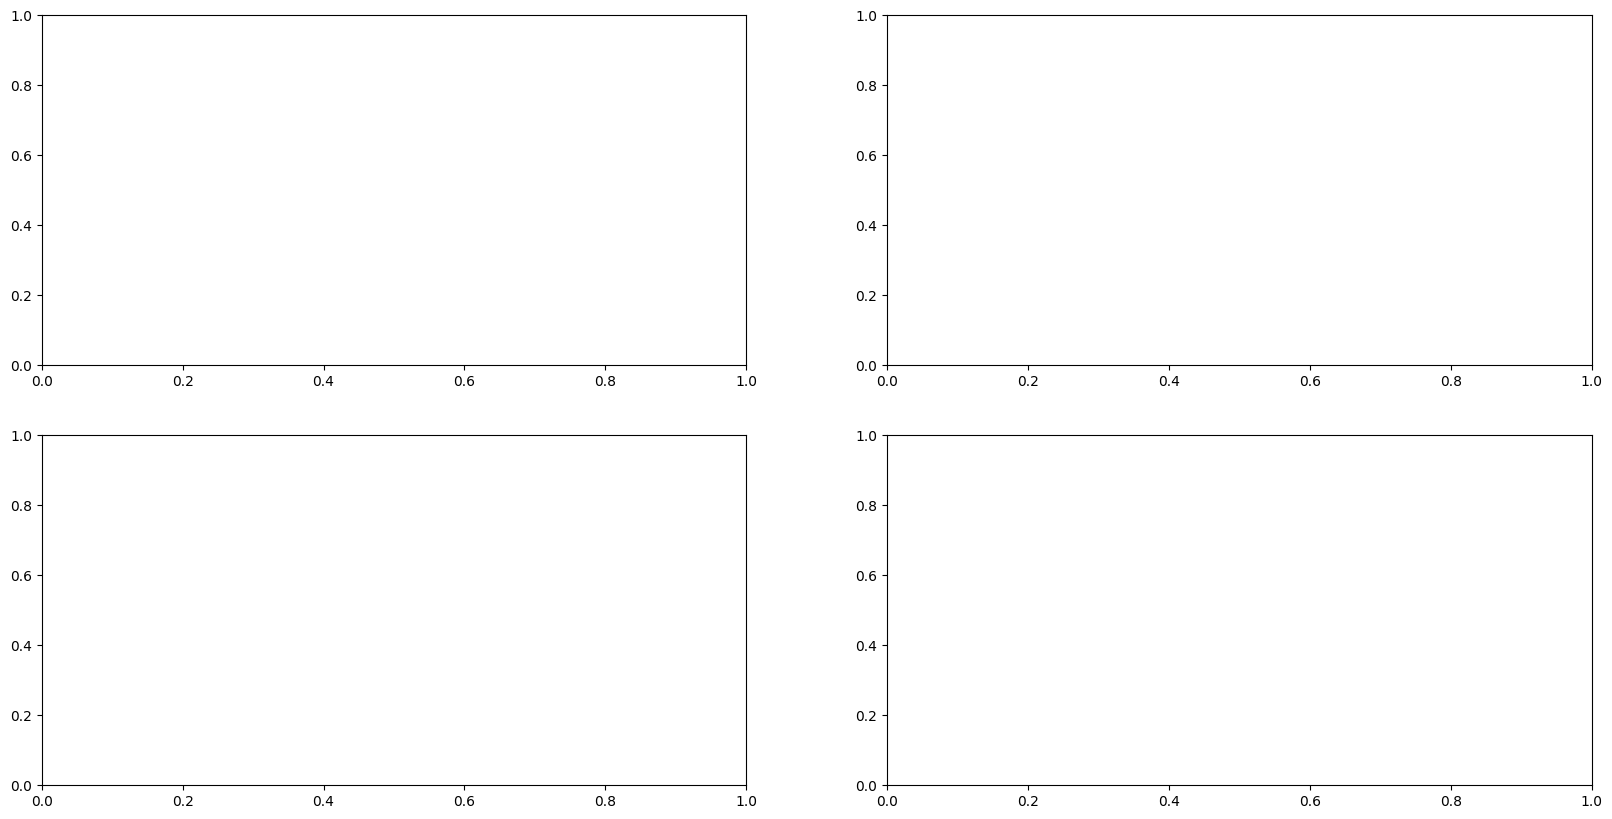

In [29]:
plt.rc('figure', figsize = (20,10))
area = plt.figure() 
g1 = area.add_subplot(2, 2, 1)
g2 = area.add_subplot(2, 2, 2)
# g3 = area.add_subplot(2, 1, 2)
g3 = area.add_subplot(2, 2, 3)
g4 = area.add_subplot(2, 2, 4)

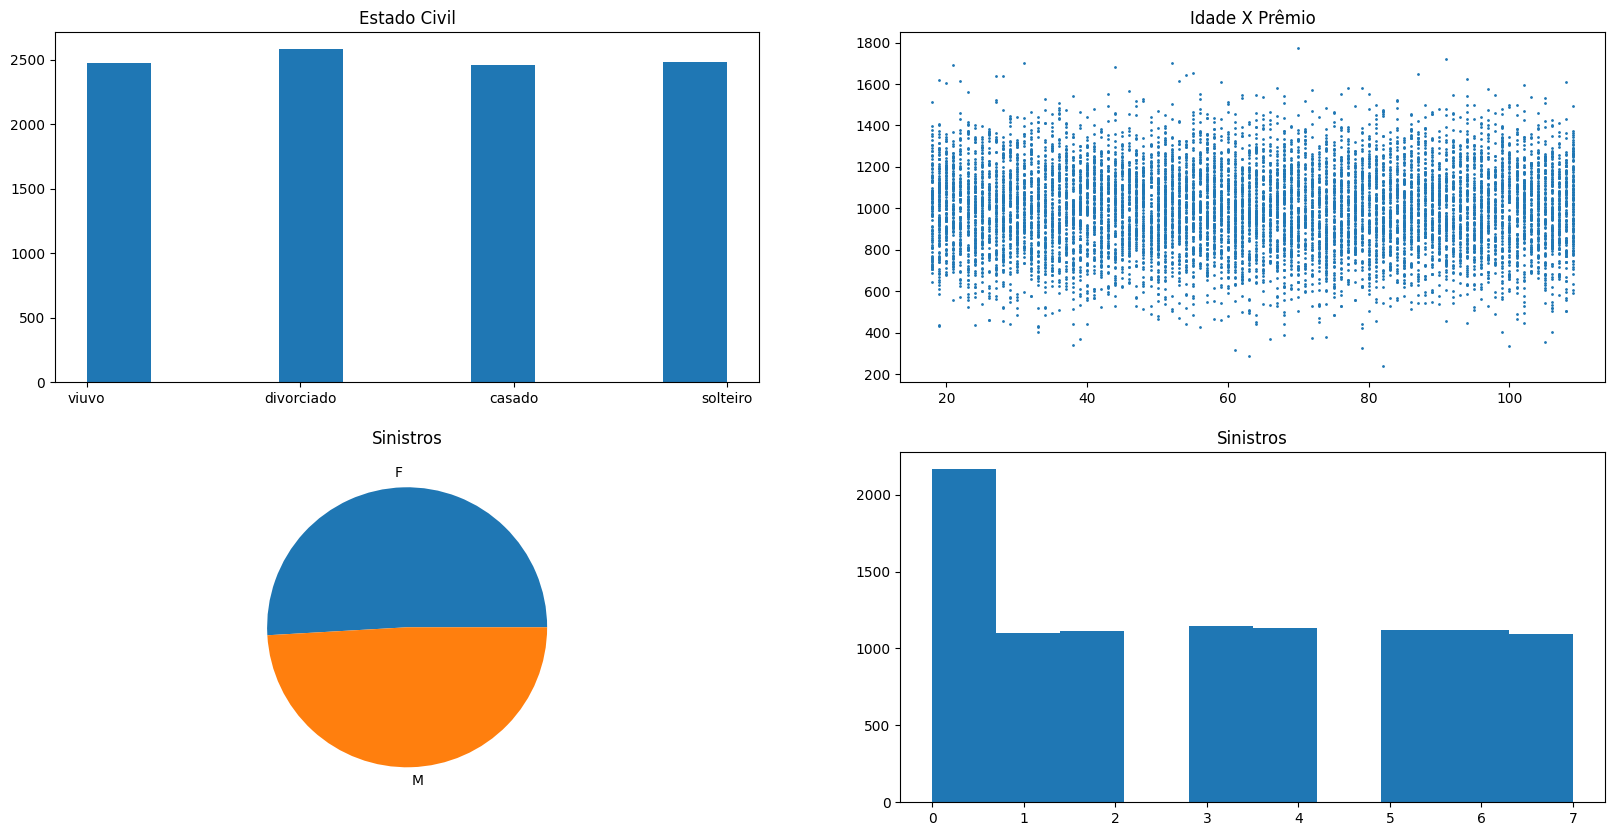

In [26]:
g1.hist(dados['Estado Civil'])
g1.set_title('Estado Civil')
g2.scatter(dados.Idade, dados.Prêmio, s=1)
g2.set_title('Idade X Prêmio')
base_g3 = dados.groupby(by='Sexo')
base_g3 = pd.DataFrame(base_g3['Sinistros'].sum().round(2)).reset_index()
g3.pie(base_g3.Sinistros,labels=base_g3['Sexo'])
g3.set_title('Sinistros')
g4.hist(dados['Sinistros'])
g4.set_title('Sinistros')
area